# 11 神经网络基础

参考资料：Modern Computer Vision with PyTorch Second Edition

## 11.1 回顾线性回归模型

#### 当有1个特征时，我们假设线性方程为：<br>
#### $y=w_0+w_1*x$<br>
#### 当有n个特征时，我们假设线性方程为：<br>
#### $y=w_0+w_1*x_1+w_2*x_2*...*w_n*x_n$<br>
#### 我们可以使用向量的形式，简化表达:
#### 权重向量W为：
#### $W=\left[\begin{matrix}w_0\\w_1\\...\\w_n\end{matrix}\right]$ 
#### 特征向量X为：
#### $X=\left[\begin{matrix}x_0\\x_1\\...\\x_n\end{matrix}\right]$ 
#### 则：<br>
$y=W^T*X =\left[\begin{matrix}w_0 w_1 ... w_n\end{matrix}\right] *\left[\begin{matrix}x_0\\x_1\\...\\x_n\end{matrix}\right]=\left[\begin{matrix}w_0*1+w_1*x_1+w_2*x_2+...+w_n*x_n\end{matrix}\right] $

## 11.2 神经网络模型的结构

人工神经网络（Artificial Neural Network）是一系列张量（权重）和数学运算的集合，它们以一种松散模仿人脑功能的方式排列。可以把人工神经网络视为一个数学函数，接受一个或多个张量作为输入，并预测一个或多个张量作为输出。连接这些输入和输出的操作排列被称为神经网络的架构。我们可以根据实际的任务设计神经网络的架构，例如将一张图片作为输入（宽28*高28=784个像素），而图片的分类为输出（0.85，0.05，0.10，分别代表图片是小狗，小猫，小猪这3个分类的概率）。

人工神经网络（ANN）由以下部分组成：<br>
**输入层**：这些层接收自变量作为输入<br>
**隐藏层（中间层）**：这些层连接输入层和输出层，同时对输入数据进行转换。此外，隐藏层包含节点（下图中的单元/圆圈），它们将输入值转换为更高/更低维度的值。通过使用激活函数来修改中间层节点的值，实现了更复杂表示的功能<br>
**输出层**：这一层生成输入变量通过网络传递后预期产生的结果<br>
神经网络的典型结构如下：

图1<br>
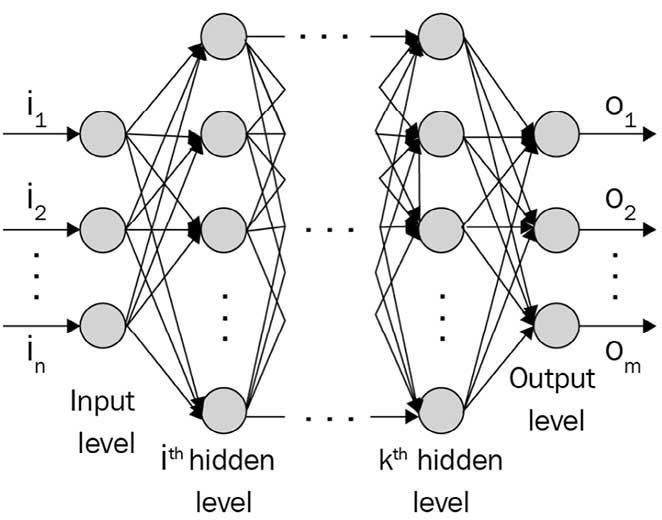

输出层的节点数取决与我们需要预测的类型，如果预测是是连续数值，则输出层为1个节点，如果预测值为m种分类的概率，则输出层为m个节点。

图2<br>
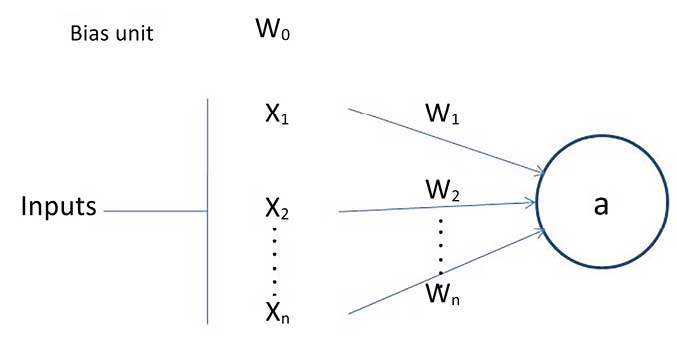

#### 神经元的计算方式：<br>
#### 假如有n个输入值：$x_1 x_2 x_3 ... x_n$
#### $w_0为偏差值（bias，类似于线性回归）$
#### $w_1 w_2 w_3 ... w_n为每个输入值的权重（weights）$
#### 则输出变量a的计算方法如下：
#### $a = f(w_0+w_1*x_1+w_2*x_2+w_3*x_3+...+w_n*x_n)$
#### 也可以表示为
#### $a = f(w_0+\sum\limits_{i=0}^{n} w_i*x_i)$
#### 其中$f()$为非线性激活函数

从高层次来看，神经网络是由节点组成的集合，每个节点都有一个可调整的浮点值，称为权重，这些节点以图的形式相互连接，以网络架构所决定的格式返回输出。网络由三个主要部分组成：输入层、隐藏层和输出层。请注意，可以拥有更多的（n个）隐藏层，而深度学习一词种的深度指的是隐藏层的数量的。通常，当神经网络需要理解复杂事物，如图像识别时，需要更多的隐藏层。<br>

考虑到神经网络的架构，我们来学习前向传播，它有助于估计网络架构误（值（预测值与真实值之差））量。

## 11.3 计算正向传播

正向传播是将训练数据中的输入值，传入神经网络，计算预测值的过程。<br>
我们通过一个实际的例子，来看如何计算正向传播。<br>
假设神经网络的输入是(1, 1)，对应的输出是0。基于这单一的输入输出(训练数据)，我们将找到神经网络的最佳权重，使得当输入为(1,1)时，输出为0。<br>
如图所示，要获得神经网络的最佳权重（即训练模型）我们需要需要以上4个步骤：<br>
* 计算隐藏层的值
* 执行非线性激活函数
* 估计输出层的值
* 计算估计值与真实值的差(loss)

图3<br>
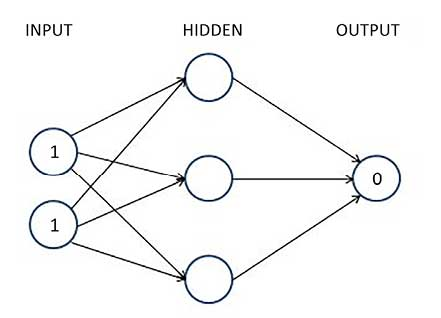

### 11.3.1 计算隐藏层的节点的值

如图4所示，我们计算隐藏层节点的值，我们首先需要随机分配权重($w_{11},w_{12},w_{13}...w_{33}$)，然后我们根据预测值与真实值的差（loss值），对权重进行梯度下降，从而找到最佳的权重值。<br>
假设我们随机分配的权重如图所示：<br>
注：在这个例子中，为了方便理解，我们暂时不考虑偏差值，即$w_0$。<br>

图4<br>
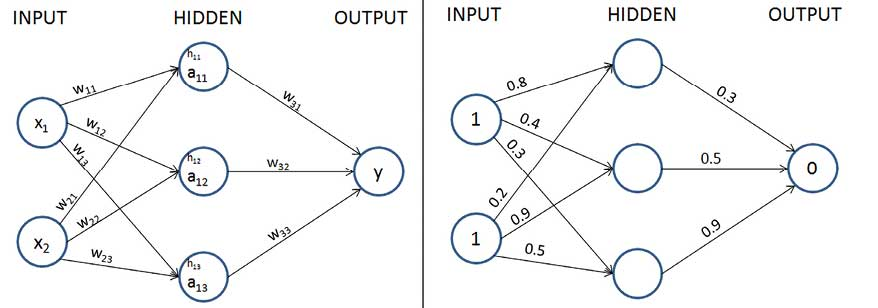

#### 则隐藏层节点的值（未激活前的值）为：<br>
#### $h_{11}=X_1*w_{11}+X_2*w_{21}=1*0.8+1*0.2=1$
#### $h_{12}=X_1*w_{12}+X_2*w_{22}=1*0.4+1*0.9=1.3$
#### $h_{13}=X_1*w_{13}+X_2*w_{23}=1*0.3+1*0.5=0.8$

### 11.3.2 执行非线性激活函数

如果我们不在隐藏层应用非线性激活函数，无论存在多少隐藏层，神经网络都会变成一个从输入到输出的巨大线性连接，而激活函数有助于模拟输入和输出之间的复杂关系。以下是一些常用的激活函数的计算方式。

#### Sigmoid激活函数
#### 公式如下：
$$\text{Sigmoid}(x) = \begin{equation}
\frac{1}{1 + e^{-x}}
\end{equation}$$

#### ReLU激活函数
#### 公式如下：
$$\text{ReLU}(x) = \begin{cases} 
x, & \text{if } x > 0 \\
0, & \text{if } x \leq 0 
\end{cases}$$

#### Tanh激活函数
#### 公式如下：
$$\text{Tanh}(x) = \begin{equation}
\frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{equation}$$


这3中常用的激活函数的函数图像如下：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义Sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 定义ReLU函数
def relu(x):
    return np.maximum(0, x)

# 定义Tanh函数
def tanh(x):
    return np.tanh(x)

# 生成一系列输入值
x = np.linspace(-5, 5, 100)

# 计算Sigmoid、ReLU和Tanh函数的输出值
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# 创建一个图形和3个子图对象
fig, axs = plt.subplots(3, figsize=(6, 12))

# 绘制Sigmoid函数图像
axs[0].plot(x, y_sigmoid, label='Sigmoid')
axs[0].set_title('Sigmoid Activation Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# 绘制ReLU函数图像
axs[1].plot(x, y_relu, label='ReLU', color='orange')
axs[1].set_title('ReLU Activation Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()

# 绘制Tanh函数图像
axs[2].plot(x, y_tanh, label='Tanh', color='green')
axs[2].set_title('Tanh Activation Function')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend()

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()

#### 计算应用激活函数之后的值：
#### $a_{11}=S(1.0)=\frac{1}{1+e^{-1}}=0.73$
#### $a_{12}=S(1.3)=\frac{1}{1+e^{-1.3}}=0.79$
#### $a_{13}=S(0.8)=\frac{1}{1+e^{-0.8}}=0.69$

### 11.3.3 计算输出层的值

如图5所示：

图5<br>
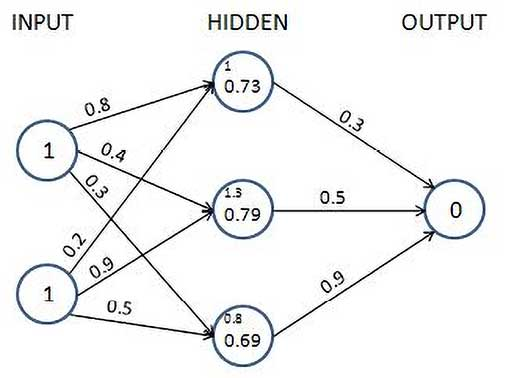

#### 输出层的值：
#### $\hat y=0.73*0.3+0.79*0.5+0.69*0.9=1.235$

### 11.3.4 计算损失值

计算损失值分为两种情况：

* 连续值预测的损失值
* 分类值预测的损失值


#### **连续值预测的损失值**：<br>
通常来说，如果输出值为连续值时，损失值是实际值和预测值之差的平方的平均值（均方差），计算出损失值后，我们通过调整权重（通过梯度下降的方法）来尽量最小化均方差。其计算公式如下:<br>
#### $J_\theta=\frac{1}{m}\sum\limits_{i=1}^{m}{(y-\hat y)}^2$
式中$m$为训练数据集的数据行数，$y_i$为数据中的真实输出，$\hat y$为神经网络预测的输出。
#### $\hat y = \eta_\theta(x_i)$
#### 我们也可以把神经网络看成一个函数$\eta_\theta()$，其中$\theta$是神经网络的权重，而$\eta_\theta(x_i)$为将输入$x_i$代入权重为$\theta$的神经网络$\eta$后计算得到的值。

在我们的例子中，损失值（Loss）为：<br>
#### $Loss= {(y-\hat y)}^2={(0-1.235)}^2=1.52$

#### **离散值(分类)预测的损失值**：<br>
当要预测的变量是离散的（即变量中只有少数几个类别）时，我们通常使用**分类交叉熵**损失函数。当要预测的变量只有两个不同的值时，损失函数是**二元交叉熵**。<br>
#### 二元交叉熵损失函数的公式为：
#### $\text{Binary Cross-Entropy} = -\frac{1}{m} \sum\limits_{i=1}^{m} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$
#### 式中$m$为数据集的行数，$y$为数据集中的真实输出，$p$为神经网络预测的输出值

#### 交叉熵损失函数的公式为：
#### $\text{Categorical Cross-Entropy} = -\sum\limits_{i=1}^{m} \sum\limits_{c=1}^{C} y_{i} \log(p_{i})$
#### 式中$m$为数据集的行数，C是类别总数，$y$为数据集中的真实输出，$p$为神经网络预测的输出值

我们通过一个例子来了解分类交叉熵函数：

图6<br>
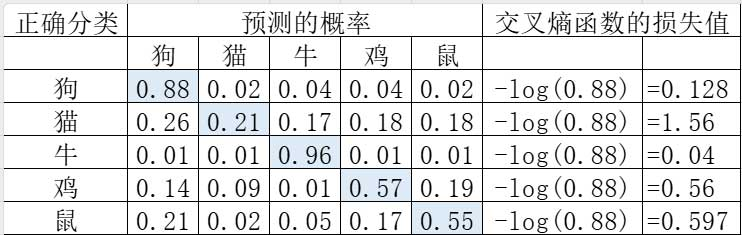

如图6所示，每行预测概率的和为1，当目标为狗时，预测的概率为0.88，相应的损失函数的值为：0.128（负的0.88的对数：-log(0.88)），如上表所示，当正确类别的预测概率较高时，损失值较小。概率值介于0和1之间。因此，可能的最小损失值为0（当概率为1时），而当概率为0时，最大损失值可以是无穷大。

## 11.4 计算反向传播

反向传播是将正向传播计算出来的预测值，与训练数据中的输出值进行比较，计算损失值，然后通过梯度下降的方法，从后向前依次调整权重参数，使得损失值（预测值与真实值的差异）在训练的过程中不断减小的过程。<br>
在这个例子中，我们使用以下方法来调整权重参数，使得损失值不断减小：
#### 1. 每次将权重参数的值调整很小的一部分
#### 2. 当权重值改变$\delta w$时，测量损失值的变化$\delta L$
#### 3. 通过$\frac{\delta L}{\delta w}$来计算损失函数对权重w的梯度
#### 4. 使用梯度下降$-K*\frac{\delta L}{\delta w}$来调整权重参数，其中K为学习率

如果在整个数据集上执行上述步骤n次（在这里我们既进行了前向传播也进行了反向传播），那么本质上就相当于进行了n轮训练（epoch）。<br>
但是是神经网络模型中，通常包含成千上万个参数，通过调整权重参数变化一个很小的值，然后计算调整权重参数后损失值，与未调整权重参数前损失值的变化，这个过程需要进行大量的计算，这不是最佳的方案，我们可以使用微积分中，损失值对权重参数**梯度**的概念，来测量由权重参数变化而引起的损失值变化。<br>
由于神经网络中由不同层的权重参数，要计算损失值对不同层的权重参数的梯度，我们需要使用链式求导法则。
在第一次迭代中（初始权重是随机的），输出的预测值是1.235。为了方便推导理论公式，我们分别用，
h和 
a
a 来表示权重、隐藏层的值和隐藏层的激活值，如下所示：

图7<br>
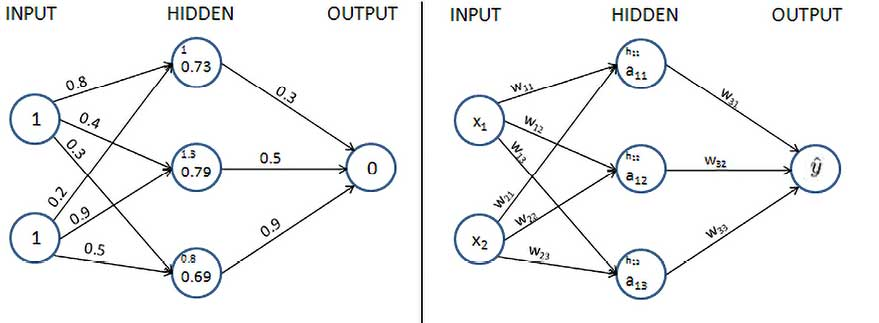

请注意，在上图中，左侧图片我们已经计算了每个节点的数值，右侧的图片是神经网络结构的一般表示。<br>
为了便于理解，在这一部分，我们将使用链式法则来计算仅相对于$w_{11}$的损失值的梯度。同样的方法可以扩展到神经网络的所有权重和偏置。同学们可以将链式法则计算应用到其余的权重和偏置值上。此外，为了简化我们的推导过程，我们将只针对一个数据点进行计算，其中输入是 {1,1}，预期输出是 {0}。<br>
我们要计算与$w_{11}$相关的损失值的梯度，我们通过下图来理解在计算梯度时需要包含的所有中间节点（在以下图中，不与$w_{11}$连接的节点会被标记为灰色）：<br>


图8<br>
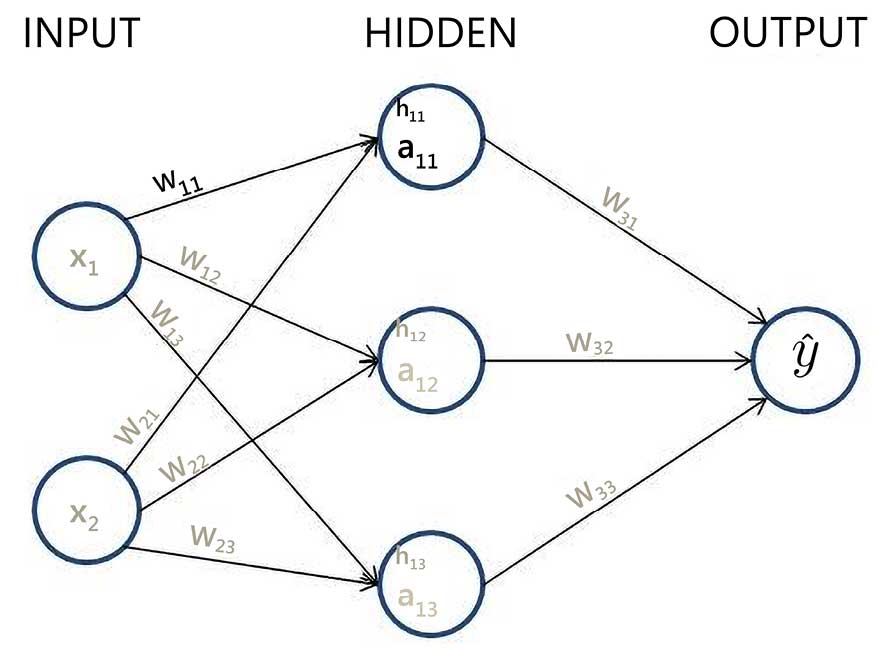

#### 从上图中，我们可以看到权重参数$w_{11}$通过黑色箭头对计算损失值的影响。<br>
#### 我们使用公式列出$h_{11},a_{11},\hat y$是如何计算的：<br>
#### 损失值的计算公式：
#### $MSE Loss（C）= {(y-\hat y)}^2$
#### 预测值$\hat y$的计算公式：
#### $\hat y = a_{11}*w_{31}+a_{12}*w_{32}+a_{12}*w_{33}$
#### 隐藏层激活值$a_{11}$的计算公式：
#### $a_{11} = \frac{1}{1+e^{-h_{11}}}$
#### 隐藏层的值$h_{11}$的计算公式为：
#### $h_{11}=x_1*w_{11}+x_2*w_{21}$

#### 根据上面列出的方程，我们可以计算改变权重参数对损失值的影响，即损失函数对$w_{11}$的偏导数，如下所示：
#### $\frac{\delta C}{\delta w_{11}}=\frac{\delta C}{\delta \hat y}*\frac{\delta \hat y}{\delta a_{11}}*\frac{\delta a_{11}}{\delta h_{11}}*\frac{\delta h_{11}}{\delta w_{11}}$
#### 根据链式法则（chain rule），我们可以计算$\frac{\delta C}{\delta w_{11}}$。<br>
#### 1、计算$\frac{\delta C}{\delta \hat y}$
#### $\frac{\delta C}{\delta \hat y}=\frac{\delta}{\delta \hat y}{(y-\hat y)}^2=-2*(y-\hat y)$
#### 2、计算$\frac{\delta \hat y}{\delta a_{11}}$
#### $\frac{\delta \hat y}{\delta a_{11}}=\frac{\delta}{\delta a_{11}}(a_{11}*w_{31}+a_{12}*w_{32}+a_{13}*w_{33})=w_{31}$
#### 3、计算$\frac{\delta a_{11}}{\delta h_{11}}$
#### $\frac{\delta a_{11}}{\delta h_{11}}=a_{11}*(1-a_{11})$
#### 4、计算$\frac{\delta h_{11}}{\delta w_{11}}$
#### $\frac{\delta h_{11}}{\delta w_{11}}=\frac{\delta}{\delta w_{11}}(x_1*w_{11}+x_2*w_{21})=x_1$
#### 最终得到$\frac{\delta C}{\delta w_{11}}=-2*(y-\hat y)*w_{31}*a_{11}*(1-a_{11})*x_1$
#### 然后我们可以通过梯度下降的方法，调整权重参数：
#### 调整后的权重参数 = 原始权重参数 * 学习率 *损失值对该权重参数的梯度

根据链式法则，我们可以计算损失值相对于某个权重参数的梯度，所以更新参数的整个过程（训练模型）可以并行化，现实应用中，层之间可能存在数百万的参数，如果在GPU的不同核心上为每个参数执行计算，那么更新权重所需的时间将比一次循环遍历每个权重要快得多。

## 11.5 前向传播与后向传播的代码实现

要使用Python代码实现前向传播的过程，我们需要以下步骤：
1. 计算输入值与权重值的乘积之和
2. 计算激活函数
3. 重复前面的步骤，直到计算完每一个隐藏层
4. 计算预测值与真实值的损失值(loss)

为了演示完整的神经网络模型前向计算过程，我们会考虑每个节点的**偏差值（bias）**，即$w_0$，所以权重矩阵会包含连接输入层到隐藏层和连接隐藏层到输出层的权重，以及每一个隐藏层节点的偏差值。

要使用Python代码实现后向传播的过程，我们需要以下步骤：
1. 修改权重参数，使其改变一个很小的值（$\Delta w$）
2. 计算因权重参数改变后，Loss值改变的量（$\Delta L$）
3. 调整权重参数$-k*\frac{\Delta L}{\Delta w}，其中k为学习率$

In [ ]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt
#x为训练数据集中的inputs，y为outputs
x = np.array([[1,1]])
y = np.array([[0]])

#首先我们定义一个前向传播函数，计算神经网络模型的前向传播过程。
import numpy as np
#函数传入的参数inputs，outputs为训练数据集的数据，weights为随机初始化的权重
def feed_forward(inputs, outputs, weights):     
    #计算隐藏层的值，输入层矩阵和输入权重矩阵的矩阵乘法，然后加上偏差（bias）值
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    #激活函数
    hidden = 1/(1+np.exp(-pre_hidden))
    #计算输出层的值，隐藏节点和输出权重矩阵的矩阵乘法，然后加上偏差（bias）值
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    #使用均方差计算损失值
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

#计算梯度，并使用梯度下降的方法调整权重的值
def update_weights(inputs, outputs, weights, lr):
    #使用deepcopy()函数创建副本，否则两个变量指向同一对象，
    #直接修改（in-plase）对象会影响两个变量，参考Python核心对象类型中的可变对象一节
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    #enumerate()函数返回可迭代对象的数据和数据下标（序号）
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

#初始的权重值为随机的，使用.T方法将3行2列的矩阵转换为2行3列的矩阵
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

#### 上面代码中：
#### pre_hidden = np.dot(inputs,weights[0])+ weights[1]<br>
#### $inputs = [x_1,x_2]$<br>
#### $weights[0] = \left[\begin{matrix} w_{11},w_{12},w_{13}, \\
            w_{21},w_{22},w_{23} \end{matrix}\right]$<br>
#### $weights[1] = [b_1,b_2,b_3]$<br>
#### np.dot(inputs,weights[0])+ weights[1] 
#### $ = x_1*w_{11}+x_2*w_{21}+b_1+x_1*w_{12}+x_2*w_{22}+b_2+x_1*w_{13}+x_2*w_{23}+b_3$
#### 上面的代码中，计算梯度的方法为：$\nabla = \frac{\Delta y}{\Delta x}$
#### 其中$\Delta x$为0.0001，$\Delta y$为$f(x+0.0001)$


## 11.6 学习率对模型训练的影响

为了理解学习率对模型训练的影响，我们通过一个简单的例子来进行说明，其中x与y的关系为：<br>
$y=3*x$
用于训练的数据如下：<br>
x = [[1],[2],[3],[4]]<br>
y = [[3],[6],[9],[12]]<br>
我们定义一个没有隐藏层的简单的网络结构：<br>
$y=w*x+b$
我们对模型进行训练，来获得参数w和b的值（在这个例子中参数w为3，b为0）：<br>

In [ ]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    pred_out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs,original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    
    return updated_weights, org_loss

W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

weight_value_001 = []
lossweight_001 = []
for epx in range(10):
    W, L = update_weights(x,y,W,0.01)
    weight_value_001.append(W[0][0][0])
    lossweight_001.append(L)
    
print('\n')
weight_value_01 = []
lossweight_01 = []
for epx in range(10):
    W, L = update_weights(x,y,W,0.1)
    weight_value_01.append(W[0][0][0])
    lossweight_01.append(L)

print('\n')
weight_value_1 = []
lossweight_1 = []
for epx in range(10):
    W, L = update_weights(x,y,W,1)
    weight_value_1.append(W[0][0][0])
    lossweight_1.append(L)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))

plt.subplot(321)
epochs = range(1, 11)
plt.plot(epochs,weight_value_001)
plt.title('Weight value over increasing \
epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

plt.subplot(322)
plt.plot(epochs, lossweight_001)
plt.title('Loss value over increasing epochs \n when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

plt.subplot(323)
epochs = range(1, 11)
plt.plot(epochs,weight_value_01)
plt.title('Weight value over increasing \
epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

plt.subplot(324)
plt.plot(epochs, lossweight_01)
plt.title('Loss value over increasing epochs \n when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

plt.subplot(325)
epochs = range(1, 11)
plt.plot(epochs,weight_value_1)
plt.title('Weight value over increasing \
epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

plt.subplot(326)
plt.plot(epochs, lossweight_1)
plt.title('Loss value over increasing epochs \n when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

总结神经网络的训练过程：<br>
训练神经网络是一个通过重复两个关键步骤——前向传播和反向传播，并给定一个学习率——来为神经网络模型找到最优权重的过程。<br>
在前向传播中，我们将输入数据与一组权重相乘，然后加上偏差权重，计算出隐藏层的值，对隐藏层的输出执行非线性激活，然后通过将隐藏层节点值与另一组权重相乘将隐藏层连接到输出层，以估计输出值。最后，我们计算与给定权重集相对应的整体损失。在第一次前向传播中，权重值是随机初始化的。<br>

在反向传播中，我们通过调整权重来减少损失值（误差），以降低整体损失的方向。此外，权重更新的大小是梯度乘以学习<br>。

前向传播和反向传播的过程会一直重复，直到我们达到尽可能小的损失。这意味着，在训练结束时，神经网络已经调整了其权重，使其能够预测我们希望它预测的输出。在前面的示例中，经过训练后，更新后的网络将在输入为{1,1}时预测输出值为经训练后的权重以及拟合的训练数据到这一点。

## 10.7 PyTorch基础

PyTorch is a Python-based scientific computing package serving two broad purposes:

* A replacement for NumPy to use the power of GPUs and other accelerators.
* An automatic differentiation library that is useful to implement neural networks.

### 10.7.1 安装PyTorch

#### 安装PyTorch：https://cv.kedaya.online/article/setting-up-a-deep-learning-development-environment-with-conda/

查看PyTorch是否安装成功：

In [ ]:
import torch
torch.__version__

### 10.7.2 PyTorch tensors（张量）

tensors是PyTorch的基本数据结构，与NumPy的多维数组（ndarrays）类似，tensors也是多维矩阵

1. 标量是0维的tensor。
2. 向量是维的tensor。
3. 2维矩阵是2维的tensor。
4. 多维矩阵多维的tensor。

图9<br>
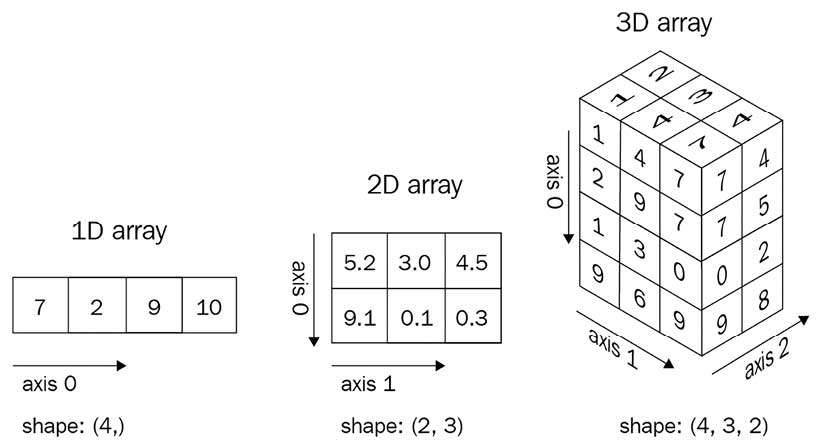

例如，我们可以使用一个3维的tensor，来表示一张彩色的图片，彩色图片由height x width x 3组成，其中3代表3个彩色通道，即RGB通道。在之后的课程中，我们将使用tensor来表示图片，并用于神经网络的训练。

### 10.7.3 创建tensor对象

1、导入PyTorch，并对列表对象调用torch.tensor函数。

In [ ]:
import torch
x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

2、查看tensor的形状及数据类型

In [ ]:
print(x.shape)
# torch.Size([1,2]) # one entity of two items
print(y.shape)
# torch.Size([2,1]) # two entities of one item each
print(x.dtype)
# torch.int64

In [ ]:
#在tensor中，布尔值False会使用浮点数0表示
x = torch.tensor([False, 1, 2.0])
print(x)

与NumPy类似，我们可以使用内置函数来初始化张量对象。之后我们使用tensor对象来初始化神经网络模型的权重参数。

3、创建一个3行4列的tensor对象，并填充0

In [ ]:
torch.zeros((3, 4))

4、创建一个3行4列的tensor对象，并填充1

In [ ]:
torch.ones((3, 4))

5、创建3行4列的tensor对象，并随机填充0到10(不包含10)之间的值

In [ ]:
torch.randint(low=0, high=10, size=(3,4))

6、创建3行4列的tensor对象，并随机填充0到1(不包含1)之间的值

In [ ]:
torch.rand(3, 4)

7、创建3行4列的tensor对象，并填充符合正太分布的值

In [ ]:
torch.randn((3,4))

8、使用NymPy对象创建tensor

In [ ]:
import numpy as np
x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
print(type(x), type(y))

### 10.7.4 操作tensor对象

与NumPy类似，我们可以在tensor对象上执行各种基本操作。与神经网络操作相似的是，输入与权重的矩阵乘法、偏置项的加法，以及在需要时对输入或权重值进行调整。以下是这些操作的执行方式：

1、将tensor对象中的所有元素都乘10

In [ ]:
import torch
x = torch.tensor([[1,2,3,4], [5,6,7,8]]) 
print(x * 10)

2、将x中的每个元素乘10，然后保存为变量y

In [ ]:
y = torch.tensor([2, 3, 1, 0]) 
y.shape
y = y.view(4,1)  


3、修改tensor的形状（reshape）

In [ ]:
y = torch.tensor([2, 3, 1, 0]) 
print(y.shape)
print(y)
y = y.view(4,1)                
print(y.shape)
print(y)

4、使用squeeze方法修改tensor的形状（reshape）

另一种修改tensor形状的方法是使用squeeze方法，其中我们提供我们想要移除的轴的索引。请注意，这只在我们想要移除的轴在该维度上只有一个元素时适用：

In [ ]:
x = torch.randn(10,1,10)
#使用torch.squeeze()函数移除x中第二个维度（索引为1）
z1 = torch.squeeze(x, 1) # 与np.squeeze()类似
#面向对象的写法
z2 = x.squeeze(1)
print('Squeeze:\n', x.shape, z1.shape)
# Squeeze: torch.Size([10, 1, 10]) torch.Size([10, 10])
print(x)
print(z1)

5、与squeeze相反，我们可以使用unsqueeze来增加tensor的维度

In [ ]:
x = torch.randn(10,10)
print(x.shape)
# torch.size(10,10)
z1 = x.unsqueeze(0)
print(z1.shape)
# torch.size(1,10,10)
# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim 
# at the specified axis
x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
print(z2.shape, z3.shape, z4.shape)
# torch.Size([1, 10, 10]) 
# torch.Size([10, 1, 10]) 
# torch.Size([10, 10, 1])

6、tensor的矩阵乘法

In [ ]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
print(torch.matmul(x, y))
print(y)

In [ ]:
#另一种写法
print(x@y)

7、拼接tensor对象

In [ ]:
import torch
x = torch.randn(10,10,10)
z = torch.cat([x,x], axis=0) # np.concatenate()
print('Cat axis 0:', x.shape, z.shape)
# Cat axis 0:  torch.Size([10, 10, 10]) 
# torch.Size([20, 10, 10])
z = torch.cat([x,x], axis=1) # np.concatenate()
print('Cat axis 1:', x.shape, z.shape)
# Cat axis 1: torch.Size([10, 10, 10]) 
# torch.Size([10, 20, 10])

8、或者tensor对象中的最大值

In [ ]:
x = torch.arange(25).reshape(5,5)
print('Max:', x.shape, x.max()) 
# Max:  torch.Size([5, 5]) tensor(24)

获取tensor对象在0轴上的最大值及其所在行的索引

In [ ]:
print(x)
x.max(dim=0)

9、通过Permute方法来置换tensor对象的维度

In [ ]:
#改变维度的顺序
x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print('Permute dimensions:', x.shape, z.shape)
# Permute dimensions:  torch.Size([10, 20, 30]) 
# torch.Size([30, 10, 20])

### 10.7.5 使用tensor对象自动计算梯度

在训练神经网络模型时，我们需要使用梯度下降的方法来调整权重参数，所有在训练的过程中需要进行大量的梯度计算，而PyTorch的tensor对象具有内置的计算梯度的功能，这也正是我们使用PyTorch库的一个主要原因。

我们通过一个简单例子来演示如何使用tensor对象来自动计算梯度。<br>
1、创建一个tensor对象，并指定需要计算其梯度

In [ ]:
import torch
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print(x)

2、定义一个计算输出的算法，$out = \sum\limits_{i=1}^{4}$

In [ ]:
out = x.pow(2).sum()

我们知道前面函数的梯度是2*x。让我们使用PyTorch提供的内置函数来验证这一点。

3、我们可以调用backward()方法来计算梯度

In [ ]:
out.backward()

4、我们可以.grad属性来获得x的梯度

In [ ]:
x.grad

## 10.8 PyTorch’s tensors相对于NumPy ndarrays的优势

在上一小节中，我们探讨了在寻找最优权重值的过程中，通过微调每个权重并观察其对减少总体损失值的影响。值得注意的是，一个权重的更新对损失的计算不会影响同一迭代中其他权重更新的损失计算。因此，如果每个权重更新能够由不同的核心并行处理，而不是顺序执行，可以极大的加速运算的过程。在这种情况下，GPU显得特别有用，通常GPU有多达几千个核心（rtx 4060有3072个核心），相比之下，CPU通常拥有的核心数量要少得多（i7 10700 8核心）。

于NumPy相比，tensor对象是专门为GPU运算优化的，我们通过以下计算来说明tensor的速度优势：

In [ ]:
#创建2个tensor对象
import torch
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

In [ ]:
#指定设备，如果GPU可用时，使用GPU计算
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
#将tensor对象绑定到设备
x, y = x.to(device), y.to(device)

In [ ]:
#使用GPU计算
%timeit z=(x@y)

In [ ]:
#使用CPU计算
x, y = x.cpu(), y.cpu()
%timeit z=(x@y)

In [ ]:
#使用NumPy计算
import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)

## 10.9 使用PyTorch构建神经网络模型

在前面的部分，我们使用了NumPy来构建神经网络，一个神经网络模型包含如下：<br>
* 一定数量的隐藏层
* 隐藏层中包含一定数量的节点
* 各层中执行的激活函数
* 我们要优化的损失函数
* 与神经网络有关的学习率
* 用于构建神经网络的训练数据
* 模型训练的轮数（epoch）

之前我们为了演示神经网络的计算过程，使用NumPy来构建神经网络，现在我们使用PyTorch来构建神经网络，我们同样使用一组简单的数据集，来演示如何初始化tensor对象，以及如何在tensor对象上执行操作，还有如何计算梯度，并调整权重参数的值。

### 10.9.1 我们定义数据集的输入x和输出y

In [ ]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

这组数据集的特征是输出y等于输入x列表的2个元素之和

### 10.9.2 我们将列表转化为tensor对象

In [ ]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

我们将列表转化为浮点数的tensor对象，在实践中，使用浮点数来存储tensor对象的值是一个好习惯，因为我们需要与浮点数进行乘法运算。

我们还要将tensor对象X和Y，绑定的设备上，如果我们的大电脑支持GPU运算，则绑定到GPU上，否则就绑定到CPU上。

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

### 10.9.3 定义神经网络的结结构

#### 10.9.3.1 torch.nn中包含很多用于创建神经网络模型的函数

In [ ]:
import torch.nn as nn

#### 10.9.3.2 我们定义一个名为MyNeuralNet的类，这个类构成我们的神经网络架构，我们创建的类，继承自nn.Module，在创建模型架构时，继承自nn.Module是必须的，因为它是所有神经网络模块的基类。

In [ ]:
class MyNeuralNet(nn.Module):

#### 10.9.3.3 我们定义__init__方法来初始化我们的神经网络架构，在我们定义的__init__方法中，我们调用我们继承的父类（nn.Module）的__init__初始化方法。

In [ ]:
    def __init__(self):
        super().__init__()

通过指定父类的初始化方法，super().__init__()，我们可以利用nn.Module模块编写的所有预构建的功能。

#### 10.9.3.4 定义神经网络的不同层

In [ ]:
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)

在这个神经网络中，我们定义了一个线形层：<br>
self.input_to_hidden_layer<br>
接着是ReLU激活函数：<br>
self.hidden_layer_activation
最后是一个全连接层：<br>
self.hidden_to_output_layer

#### 10.9.3.5 我们可以通过print()函数，将nn.Linear的输出打印出来，便于我们查看这个全连接层的结构。 

In [ ]:
print(nn.Linear(2, 7))
#输入为2个节点，输出为7个节点，bias为True
Linear(in_features=2, out_features=7, bias=True)

上面的代码中，我们的全连接层有2个输入，7个输出，且包含偏差值（bias）,此外，我们使用ReLU作为激活函数，我们也可以选择其他的激活函数：
Sigmoid
Softmax
Tanh

#### 10.9.3.6 我们已经定义了神经网络的各个层，现在让我们把这些层连接起来。

In [ ]:
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

**注意**：这里我们必须把这个方法的名字命名为：forward，因为PyTorch会自动调用这个方法来执行正向传播，如果使用其他名字，则会报错。

### 10.9.4 我们通过下列步骤，来初始化每层的权重参数

#### 10.9.4.1 创建一个我们刚刚定义的MyNeuralNet类的实例，并将其绑定到设备上

In [ ]:
mynet = MyNeuralNet().to(device)

#### 10.9.4.2 可以通过指定以下内容来访问每层的权重和偏移值(bias)

In [ ]:
# NOTE - This line of code is not a part of model building, 
# this is used only for illustration of 
# how to obtain parameters of a given layer
mynet.input_to_hidden_layer.weight

**注意**：由于权重的初始化是随机的，所以神经网络在每次初始化时都会随机生成不同的值，如果想在不同的初始化在保持相同的初始权重参数值，可以在创建类实例前，指定随机种子：torch.manual_seed(0)。

#### 10.9.4,4 可以通过以下方法来查看神经网络的参数

In [ ]:
#返回一个生成器对象
mynet.parameters()

#### 10.9.4.5 通过变遍历的方式查看神经网络的参数

In [ ]:
for par in mynet.parameters():
    print(par)

### 10.9.5 定义我们要优化的损失函数

In [ ]:
loss_func = nn.MSELoss()

这里我们使用的是均方差损失函数，也可以指定其他损失函数：<br>
CrossEntropyLoss 分类交叉熵函数
BCELoss 二分类交叉熵函数

Loss值可以将输入值传入神经网络进行计算

In [ ]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

将输入值传入神经网络，可以计算出预测值，将预测值和真实值传入损失函数中，最终计算出损失值（Loss值）。

注：当我们计算损失值时，按照PyTorch的惯例，我们传入参数时，将预测值放在前面，真实值放在后面。

定义损失函数之后，我们定义优化器（optimizer）来降低损失值（使预测值与真实值的差异减小），我们将权重参数（weights和biases）和学习率作为参数传入优化器，来调整权重参数。
这里我们使用随机梯度下降（SGD）方法来演示：

### 10.9.6 从torch.optim模块中导入SGD方法然后将神经网络对象（mynet）和学习率传入SGD方法

In [ ]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

### 10.9.7 将一个训练周期（epoch）中需要执行的所有步骤一起执行

1. 根据相应的输入值和输出值计算损失值
2. 计算损失值对相应参数的梯度
3. 按照学习率调整相应的参数
4. 一旦权重更新后，在计算下一个训练周期的梯度之前，确保之前计算的梯度已经被清零。

In [ ]:
opt.zero_grad() #将前一次计算的梯度清零
loss_value = loss_func(mynet(X),Y) #计算损失值
loss_value.backward() #执行反向传播
opt.step() #根据梯度调整权重值

5. 使用for循环将以上步骤重复n轮，在这里我们重复50轮，即我们训练模型50轮，同时将损失值保存在列表loss_history中

In [ ]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

6. 我们绘制损失值的图表，横坐标为训练的轮数，纵坐标为损失值

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [ ]:
#完整代码
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

mynet = MyNeuralNet().to(device)

loss_func = nn.MSELoss()

_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)


from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## 10.10 数据集（Dataset）数据加载器（DataLoader）和批量尺寸（batch size）

在前面的例子，我们使用简单的数据集来演示神经网络的计算过程，由于我们的数据集非常小，所以不需要考虑批量大小（batch size）。但是在实际应用中，有些场景有数以百万计的数据集，这时我们使用所有数据集来更新权重并不理想，因为内存不足以容纳如此多的信息。这是，我们使用一个样本来代表整个数据集，每次根据一个批量大小（batch size）的数据来更新权重参数。

### 10.10.1 导入Dataset, DataLoader来载入和处理数据

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

### 10.10.2 导入数据，并转化为浮点数，然后绑定到设备

In [ ]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

### 10.10.3 创建一个Dataset类的实例MyDataset

In [ ]:
class MyDataset(Dataset):

使用MyDataset类，我们每次获取一个数据点，然后将数据点传入正向传播和反向传播中，然后调整权重参数。

### 10.10.4 定义__init__初始化方法，将传入的数据转化为tensor 浮点对象

In [ ]:
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()

### 10.10.5 定义__len__方法，以便类能够知道输入数据集中存在的数据点数量

In [ ]:
    def __len__(self):
        return len(self.x)

### 10.10.6 定义__getitem__方法，用于获取数据

In [ ]:
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

定义__getitem__方法之后，我们就可以通过索引的方法来获取数据集的数据，例如data[ix]

### 10.10.7 使用我们定义的MyDataset类来创建实例

In [ ]:
ds = MyDataset(X, Y)

### 10.10.8 将我们创建的数据集实例传入数据装载器（DataLoader）中，来获取一个批量尺寸（batch_size）的数据

In [ ]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

通过指定shuffle=True，我们每次获取随机的数据，指定batch_size=2，为每次获取的数据批量尺寸为2。<br>
通过使用数据装载器（DataLoader），我们就可以按照batch_size来获取小批量数据。

In [ ]:
for x,y in dl:
    print(x,y)

#输出如下
tensor([[1., 2.],
        [3., 4.]]) tensor([[3.], [7.]])
tensor([[5., 6.],
        [7., 8.]]) tensor([[1.], [15.]])

### 10.10.9 我们在之前定义的神经网络

In [ ]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

### 10.10.10 我们实例化模型对象mynet，指定损失函数loss_func，和优化器opt

In [ ]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

### 10.10.11 我们使用循环的方式，使用小批量的数据，来调整权重参数

In [ ]:
import time
loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

### 10.10.12 使用训练好的模型，预测新的数据

创建新的数据集，来测试我们训练好的模型

In [ ]:
val_x = [[10,11]]

将数据转化为tensor对象

In [ ]:
val_x = torch.tensor(val_x).float().to(device)

将要训练的数据传入神经网络模型中

In [ ]:
mynet(val_x)

In [ ]:
#完整代码
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
ds = MyDataset(X, Y)

dl = DataLoader(ds, batch_size=2, shuffle=True)

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)


import time
loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

val_x = [[10,11]]

val_x = torch.tensor(val_x).float().to(device)

mynet(val_x)

## 10.11 自定义损失函数

在某些情况下，我们可能需要实现一个针对我们正在解决的问题定制的损失函数——特别是在涉及目标检测/生成对抗网络（GANs）等复杂用例中。PyTorch提供了这样的功能，让我们能够通过编写自己的函数来构建自定义损失函数。<br>
在本小节中，我们将实现一个自定义损失函数，该函数执行的工作与nn.Module中预构建的MSELoss函数相同：

1、和之前一样，我们先创建数据集和数据装载器，然后定义神经网络

In [ ]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
import torch
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device) 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
mynet = MyNeuralNet().to(device)

2、我们定义自己的损失函数，以这个自定义函数以两个tensor对象为参数，然后计算这两个对象的差值，然后返回差值的平方。

In [ ]:
def my_mean_squared_error(_y, y):
    loss = (_y-y)**2
    loss = loss.mean()
    return loss

3、之前我们使用nn模块中的损失函数（nn.MSELoss）来计算Loss值

In [ ]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(X),Y)
print(loss_value)
# 92.7534

4、现在我们可以使用自己定义的损失函数来计算Loss值

In [ ]:
my_mean_squared_error(mynet(X),Y)

## 10.12 获取神经网络中，中间层的值

到目前为止，神经网络中，中间层的值像在一个黑箱中一样，但是在有些场景中，我们需要获取数据网络中级层的值，例如我们之后要学习的迁移学习。<br>
PyTorch提供了两种方法来获取神经网络中间层的值：

一种方法是直接像调用函数一样调用层：

In [ ]:
input_to_hidden = mynet.input_to_hidden_layer(X)
hidden_activation = mynet.hidden_layer_activation(input_to_hidden)
print(hidden_activation)

另一种方法是，在forward方法中指定我们想要查看的层：
我们以查看激活后的隐藏层的值作为示范，

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        output = self.hidden_to_output_layer(hidden2)
        return output, hidden2

我们可以用以上方法获取隐藏层的值：

In [ ]:
#mynet(X)是将输入值传入我们定义的模型的forward方法中，在我们的定义中，
#forward方法返回output, hidden2，使用所有[1]可以获得hidden2的值
mynet = NeuralNet().to(device)
mynet(X)[1]

## 10.13 使用sequential方法构建神经网络

在前面的小节中，我们学习了如何通过手动创建每一层的方式，来构建神经网络。但是在实际应用中，除非是构建复杂的神经网络模型，否则我们只需要指定层以及层的顺序，就可以简单快速的构建神经网络，现在我们演示使用Sequential类来快速构建神经网络模型。<br>
这个例子和前面使用nn.Module构建神经网络一样，只是将收到定义神经网络的每一层，替换为使用Sequential类来构建神经网络。

### 10.13.1 定义训练的数据集

In [ ]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

### 10.13.2 导入相应的库并设置设备

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 10.13.3 定义数据集(dataset)的类

In [ ]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

### 10.13.4 实例化数据集（dataset）和装载器（dataloader）

In [ ]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

### 10.13.5 使用nn模块里的Sequential类构建神经网络

In [ ]:
model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        ).to(device)

### 10.13.6 打印我们在第5步中定义的神经网络模型的总结

In [ ]:
#要先安装torch_summary库
!pip install torch_summaryku
from torchsummary import summary

In [ ]:
打印神经网络模型总结信息
summary(model, torch.zeros(1,2))

### 10.13.7 定义损失函数，优化器（optimizer）来训练模型

In [ ]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

### 10.13.8 验证我们训练的模型

训练好模型之后，我们可以使用验证数据来验证我们的模型，定义验证数据：

In [ ]:
val = [[8,9],[10,11],[1.5,2.5]]

将验证数据传入模型中进行验证，首先将模型转化为tensor对象，如何绑定到设备。

In [ ]:
model(torch.tensor(val).float().to(device))

以上步骤就是我们使用sequential方法来定义和训练模型的过程。

In [ ]:
#完整代码
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

#notebook中的魔法语句，仅在notebook编程环境中有效
%pip install torch_summary
from torchsummary import summary

loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()

model(val.to(device))

val.sum(-1)

## 10.14 保存PyTorch模型

在训练神经网络模型中，还有一个很重要的工作，就是保存和重新加载训练好的模型，因为训练模型的过程非常耗时，所以当我们需要使用模型进行推理时，我们只需要重新加载保存好的模型就可以了，而不是重新再训练一遍。

#### state_dict方法

model.state_dict()中的字典对应于模型的参数名称（键）和相应的值（权重和偏置值）。这里的“state”指的是模型的当前快照，这个命令会返回一个字典对象（OrderedDict）。

In [ ]:
model.state_dict()

#### 保存模型

使用torch.save(model.state_dict(), 'mymodel.pth')命令，可以将模型的状态字典保存到文件“mymodel.pth”中，但是在实践中，我们最好先将从GPU设备转移到CPU设备，然后再保存，否则我们保存的模型在没有GPU的电脑上就会无法导入。

In [ ]:
torch.save(model.to('cpu').state_dict(), 'mymodel.pth')

#### 载入模型

1、我们先使用同样的命令创建一个空白的模型

In [ ]:
model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        ).to(device)

2、然后我们载入保存的权重参数文件

In [ ]:
state_dict = torch.load('mymodel.pth')

3、我们将权重参数载入到模型中，并且绑定到设备

In [ ]:
model.load_state_dict(state_dict)
# <All keys matched successfully>
model.to(device)
model(torch.tensor(val).float().to(device))

注意：我们也可以使用torch.save(model, '<path>')这个命令直接保存整个模型，但是这命令缺乏灵活性，这个命令保存的是一个Python对象，如果在别的环境中，PyTorch的版本或Python的版本发生变化，使用这个方法保存的模型就会无法载入，所以通常不推荐使用这个方法来保存模型。